# **TRANSFORMAÇÃO E DIFERENCIAÇÃO**

In [151]:
# immportar as bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
# configurar o tamanho as nossas figuras
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

### **Transformação**

transformação: nós tentarmos transformar a série que não tem uma distribuição normal em uma distribuição aproximadamente normal. 

Vamos utilizar como exemplo o arquivo AirPassengers, com dados mensais de 1949 até 1960.

**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**


In [153]:
dados = pd.read_csv('AirPassengers.csv',
                    sep=',')

In [154]:
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Criamos e plotamos a série

In [155]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

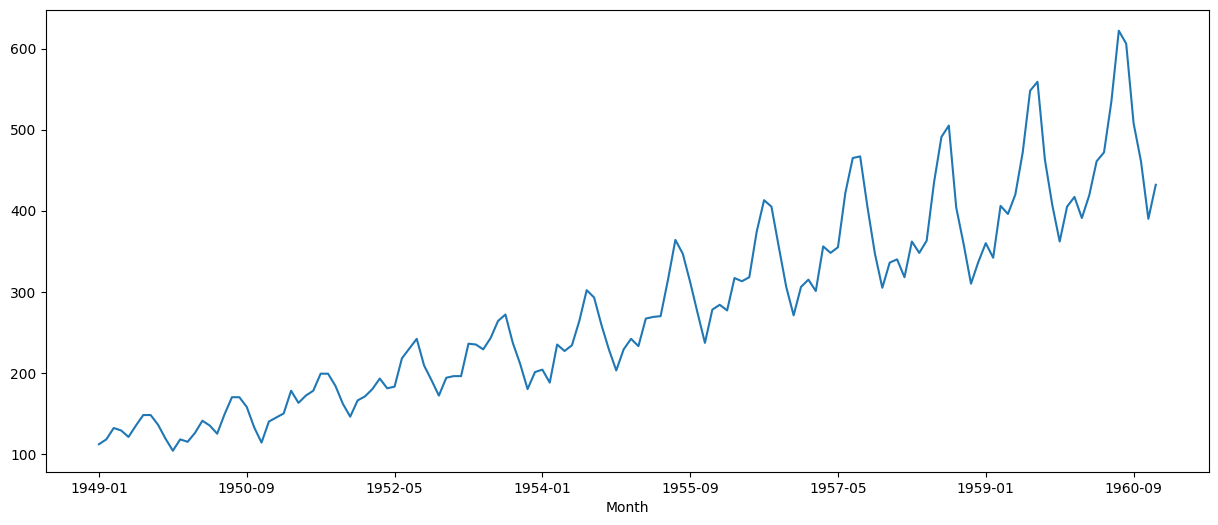

In [156]:
serie.plot()
plt.show()

In [157]:
serie.info()

<class 'pandas.core.series.Series'>
Index: 144 entries, 1949-01 to 1960-12
Series name: None
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 6.3+ KB


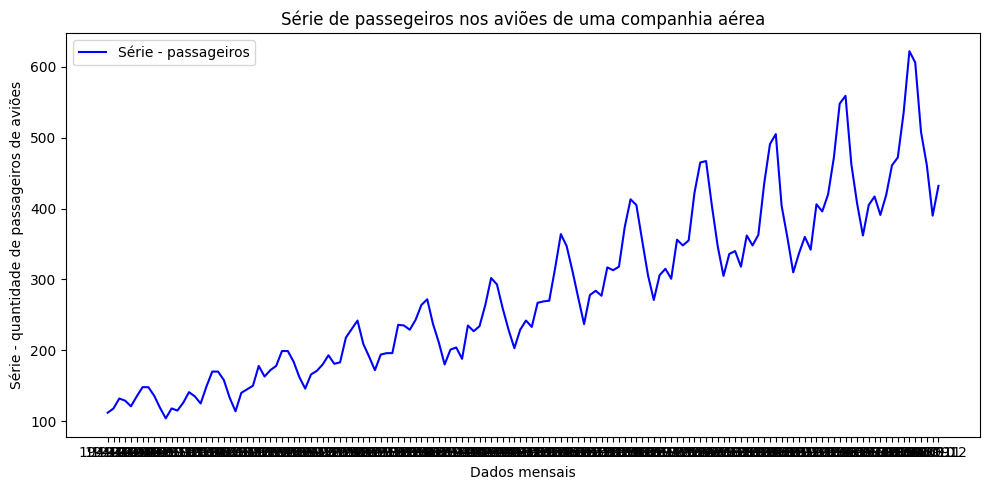

In [158]:
import matplotlib.dates as mdates


# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
#plt.plot(serie, label="Série")
plt.plot(serie.index, serie.values, label='Série - passageiros', color='blue')

# Adicionando um título ao gráfico
plt.title("Série de passageiros nos aviões de uma companhia aérea")

# Definindo rótulos dos eixos
plt.xlabel("Dados mensais")
plt.ylabel("Série - quantidade de passageiros de aviões")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)


# Formatando o eixo x para mostrar a cada 4 meses
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Colocar um marcador a cada 4 meses
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formatando para exibir ano e mês

#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Tracinhos diários
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato das datas

# Configurando os tracinhos no eixo X de 90 em 90 dias (aproximadamente 3 meses)
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Formatando o eixo X para mostrar ano e mês
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# Configurando os tracinhos no eixo X de 1 em um mês
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Formatando o eixo X para mostrar ano e mês
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


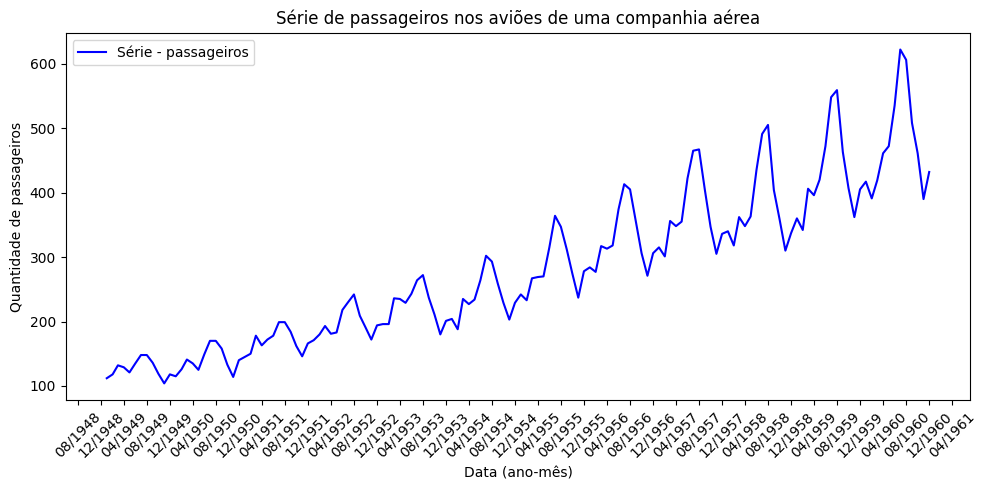

In [159]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Certificando-se de que o índice é uma série temporal (caso não esteja)
if not pd.api.types.is_datetime64_any_dtype(serie.index):
    serie.index = pd.to_datetime(serie.index, format='%Y-%m')  # Converte para ano-mês

# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série usando o índice como eixo x
plt.plot(serie.index, serie.values, label='Série - passageiros', color='blue')

# Adicionando um título ao gráfico
plt.title("Série de passageiros nos aviões de uma companhia aérea")

# Definindo rótulos dos eixos
plt.xlabel("Data (ano-mês)")
plt.ylabel("Quantidade de passageiros")

# Configurando os tracinhos no eixo X de 4 em 4 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Tracinhos a cada 4 meses

# Formatando o eixo X para mostrar apenas ano e mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Exibindo apenas ano e mês

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=45)

# Adicionando a legenda
plt.legend()

# Ajustando para melhor layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Tendência crescente com o passar dos anos

mostra a sazonalidade bem clara, e de tempos e tempos tem um aumento pequeno e aumenta a amplitude ao longo dos anos. 

Vamos verificar a normalidade 

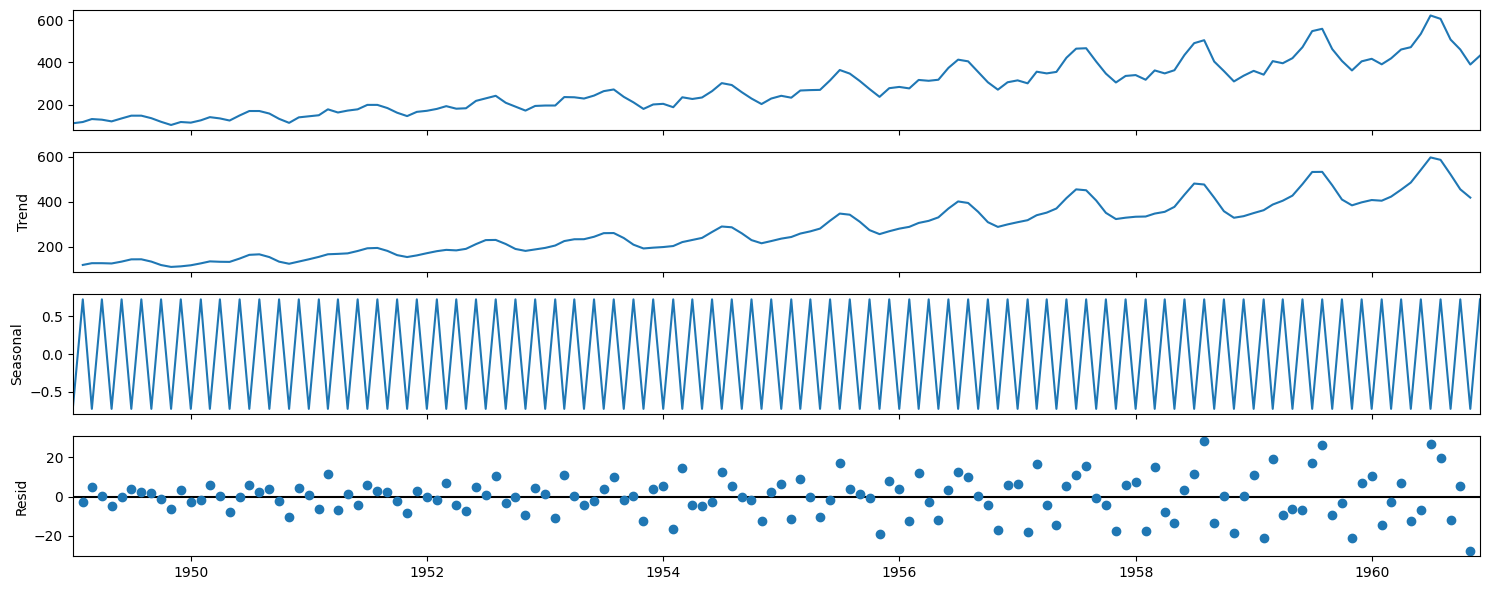

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(serie, period=2)
decomposicao.plot();

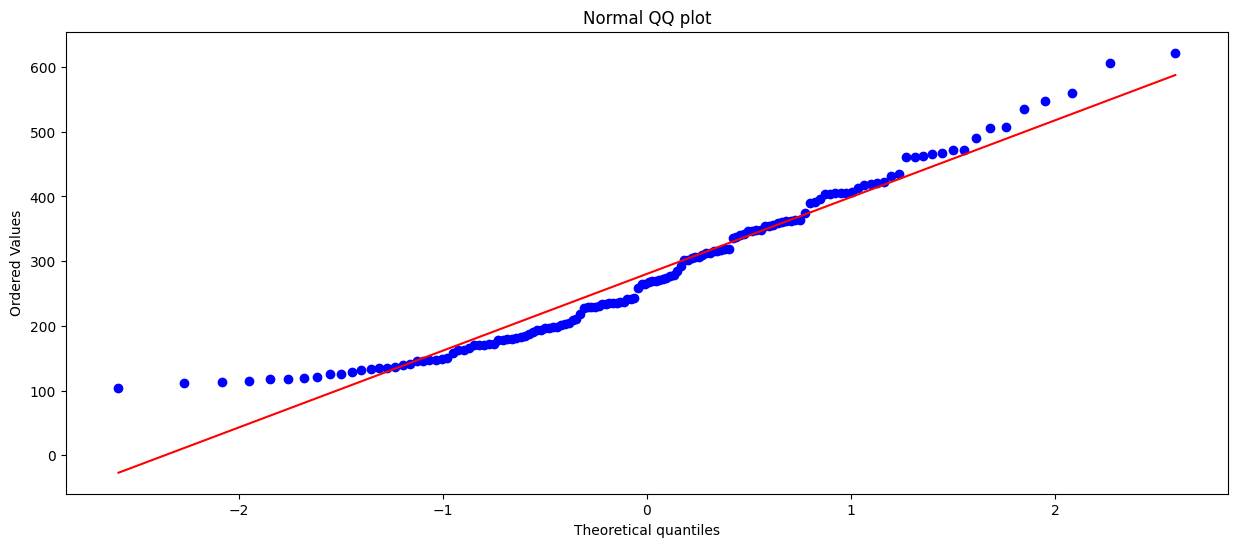

In [161]:
import scipy.stats as stats

stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()




Temos problemas de normalidade no começo e no final dos dados 




## A tendência tem uma distribuição NÃO normal, no início e no final; a distribuição pode melhorar. 

Faremos o teste de shapiro- wilk, a hipótese nula da distribuição normal é quando p for maior que 0,05. 

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).




In [162]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))
if p > 0.05:
   print('p-valor: {} é uma distribuição normal, como p>0,05'.format(p))
elif p<= 0.05:
     print('p-valor: {} a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)\n p<=0.05'.format(p))


Estatística de teste: 0.9519577090493235
p-valor: 6.832415574230719e-05
p-valor: 6.832415574230719e-05 a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)
 p<=0.05


## Não é normal usamos ou a aplicação logarítmica ou a transformação pela raís cúbica, 
# Vamos fazer pela logarítmica. Faremos o log de toda a série. 

In [163]:
# Transformação por log (Diminuir variância e melhorar normalidade)
serie2 = np.log(serie)
serie2

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Length: 144, dtype: float64

Vamos verificar se melhorou

aproximou mais no início, no meio afastou um pouco, mas terá que calcular novamente. 

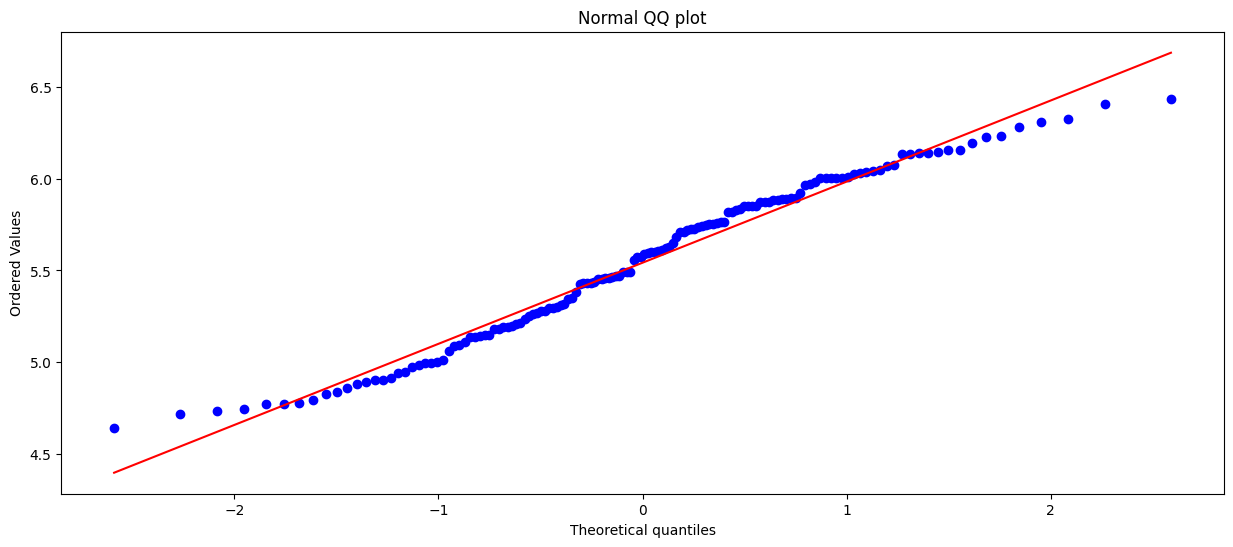

In [164]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [165]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

if p > 0.05:
   print('p-valor: {} é uma distribuição normal, como p>0,05'.format(p))
elif p<= 0.05:
     print('p-valor: {} a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)\n p<=0.05'.format(p))



Estatística de teste: 0.9732353614283915
p-valor: 0.00637340847572561
p-valor: 0.00637340847572561 a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)
 p<=0.05


ainda é uma distribuição não normal, mas melhorou um pouco. Os dados estatísticos tem uma melhor performance quando os dados têm uma distribuição normal. 

In [166]:
# Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)
# ou apenas 
# serie3= (serie)**(1/3) fica negativo com números complexos: raiz quadrada de -9, não tem raiz quadrada. apareceria como nan.
# raíz  cúbica -1 tem. 
# sign sinal da série, * valor absoluto * extrai a raiz cúbica
serie3 = np.sign(serie)*abs(serie)**(1/3)
serie3

Month
1949-01-01    4.820285
1949-02-01    4.904868
1949-03-01    5.091643
1949-04-01    5.052774
1949-05-01    4.946087
                ...   
1960-08-01    8.462348
1960-09-01    7.979112
1960-10-01    7.725032
1960-11-01    7.306144
1960-12-01    7.559526
Length: 144, dtype: float64

In [167]:
print((27)**(1/3))
print((-27)**(1/3)) # seria -3, mas o resultado fica como número complexo


#sign para manter o sinal, valor absoluto é o abs
print(np.sign(-27)*abs(-27)**(1/3)) # valor do número real

print(np.sign(27)*abs(27)**(1/3)) # valor do número real

3.0
(1.5000000000000004+2.598076211353316j)
-3.0
3.0


muitas séries não tem valores negativos, mas no nosso caso tem, temos que tomar cuidado, usar o sign e o abs.

melhorou nossos dados pelo QQ plot, como indica no gráfico.

na figura o problema ainda é nos valores inícias e finais

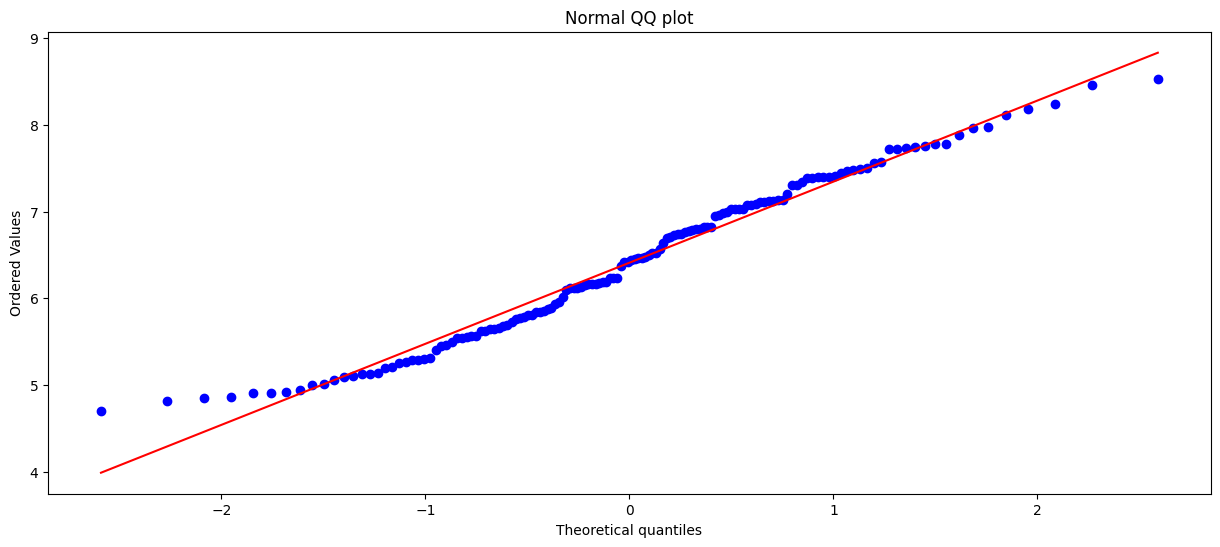

In [168]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [169]:
e, p = stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

if p > 0.05:
   print('p-valor: {} é uma distribuição normal, como p>0,05'.format(p))
elif p<= 0.05:
     print('p-valor: {} a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)\n p<=0.05'.format(p))


Estatística de teste: 0.9745990172008551
p-valor: 0.008834884213460145
p-valor: 0.008834884213460145 a hipótese nula foi rejeitada, pois NÃO é uma distribuição normal. (hipótese alternativa,no caso)
 p<=0.05


ainda não foi possível, a série NÃO é uma distribuição normal. Mas, nossos dados deram uma melhorada.

# olhar um histograma, usando o sns

In [170]:
#!pip install seaborn

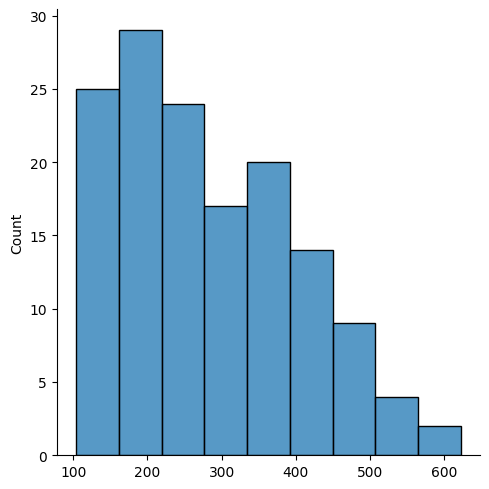

In [171]:
import seaborn as sns

sns.displot(serie);



# dados originais, não tem cara de distribuição normal
não tem uma divisão uniforme

/tmp/ipykernel_5341/1825356051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);


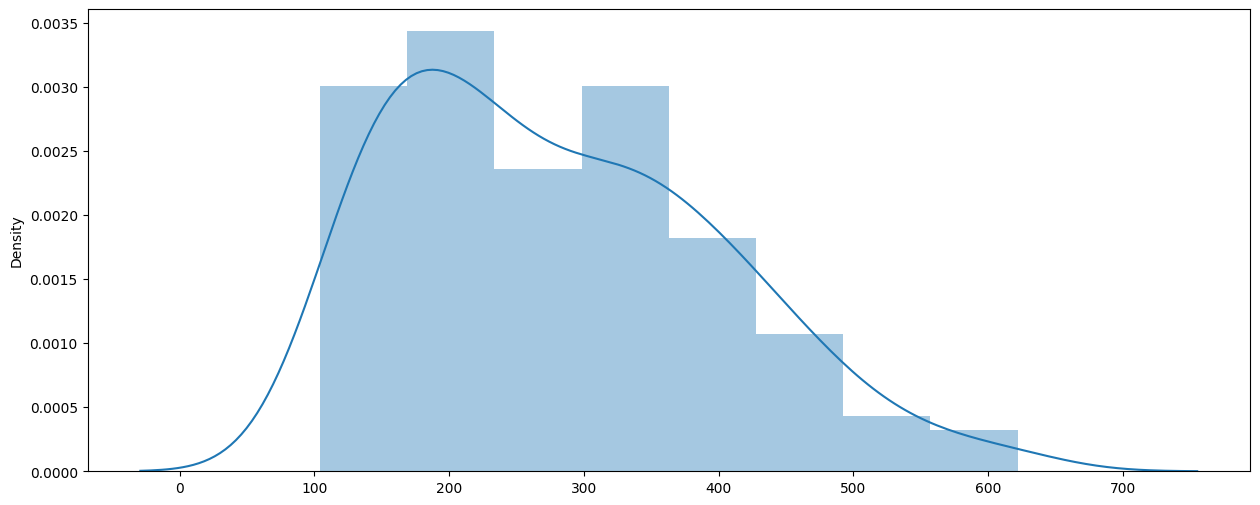

In [172]:
sns.distplot(serie);

melhorou um pouco, mas ainda não é uma distribuição normal

distribuição normal tem que ter uma divisão simétrica 

/tmp/ipykernel_5341/1113069810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie2);


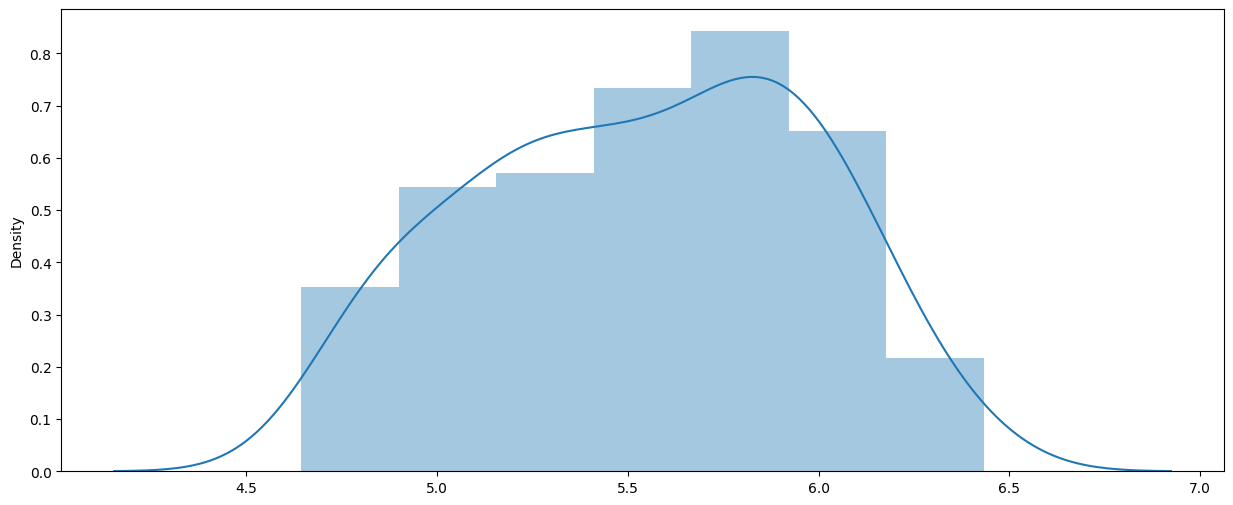

In [173]:
sns.distplot(serie2);

visualmente a log ficou um pouco melhor que a cúbica.

/tmp/ipykernel_5341/749643845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie3);


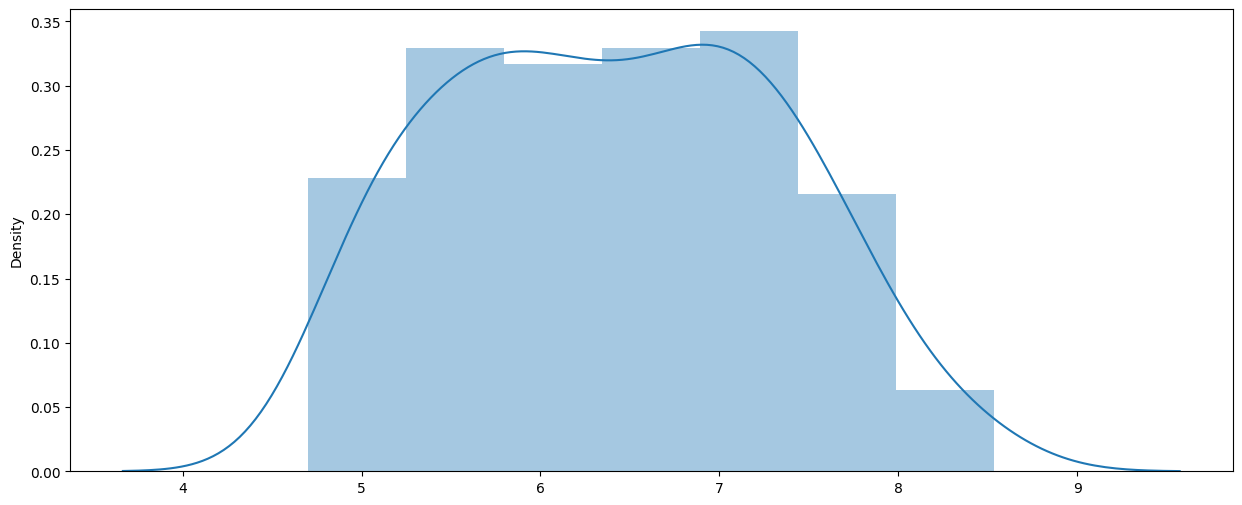

In [174]:

sns.distplot(serie3);

In [175]:
print('final da parte 1')

final da parte 1


### importação do pacote stats models. 





### **DIFERENCIAÇÃO**

In [176]:
import statsmodels.tsa.stattools



## Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)


Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

Test KPSS, teste estatístico,

vamos usar o valor crítico em 5%

In [177]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))


    

Estatítica do teste: 1.6735
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/tmp/ipykernel_5341/3923413404.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie3)


In [178]:

if kpss[0] > kpss[3]['5%']:
  print('Ha = não é estacionário: Estatítica do teste: {:.4f} > valor crítico {}'.format(kpss[0],kpss[3]['5%']))
if kpss[0] < kpss[3]['5%']:
  print('Ho = é estacionário: Estatítica do teste: {:.4f} < valor crítico {}'.format(kpss[0],kpss[3]['5%']))  


Ha = não é estacionário: Estatítica do teste: 1.6735 > valor crítico 0.463


## Teste df (Dickey Fuller)

Teste df (Dickey Fuller)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [179]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -0.8100
p_valor: 0.81615655
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788


In [180]:

if df[0] > df[4]['5%']:
  print('Ha = não é estacionário: Estatítica do teste: {:.4f} > valor crítico {}'.format(df[0],df[4]['5%']))
if df[0] < df[4]['5%']:
  print('Ho = é estacionário: Estatítica do teste: {:.4f} < valor crítico {}'.format(df[0],df[4]['5%']))  

Ha = não é estacionário: Estatítica do teste: -0.8100 > valor crítico -2.8840418343195267


# faremos a diferenciação, no caso da série 3

In [181]:
# diferenciação

serie4 = np.diff(serie3)
serie4

array([ 0.0845836 ,  0.18677524, -0.03886902, -0.1066869 ,  0.1838404 ,
        0.15964463,  0.        , -0.14700929, -0.22387845, -0.21601536,
        0.20219876, -0.041924  ,  0.1503538 ,  0.19152993, -0.07490002,
       -0.12992784,  0.30145919,  0.23819906,  0.        , -0.13353808,
       -0.30165145, -0.25566114,  0.34368652,  0.06109377,  0.05970497,
        0.31193348, -0.16267076,  0.0987422 ,  0.06392856,  0.21304613,
        0.        , -0.1505385 , -0.23637218, -0.18572435,  0.23022723,
        0.05463444,  0.09571707,  0.13278039, -0.12234374,  0.02075855,
        0.34105028,  0.10846402,  0.10475401, -0.29720754, -0.17550692,
       -0.19766745,  0.22766261,  0.01982536,  0.        ,  0.37096087,
       -0.00874081, -0.05297262,  0.1222183 ,  0.17481719,  0.06415494,
       -0.29076084, -0.23512095, -0.30712564,  0.21154983,  0.02899931,
       -0.158111  ,  0.44235148, -0.07083559,  0.06206995,  0.25282851,
        0.29410419, -0.06732066, -0.26754111, -0.25627792, -0.24

## Série 4: na primeira diferenciação, vemos uma mudança com relação à variabilidade dos dados. Há uma variação com relação à variança, mas os dados estão melhor.

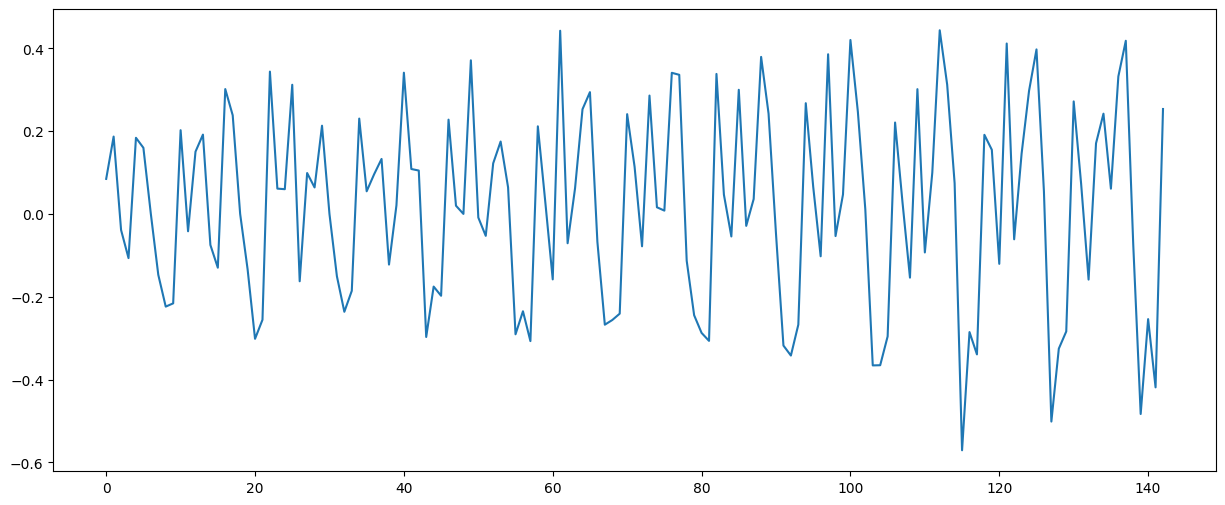

In [182]:

plt.plot(serie4)
plt.show()

 Vamos plotar a série 3 para comparar também. 

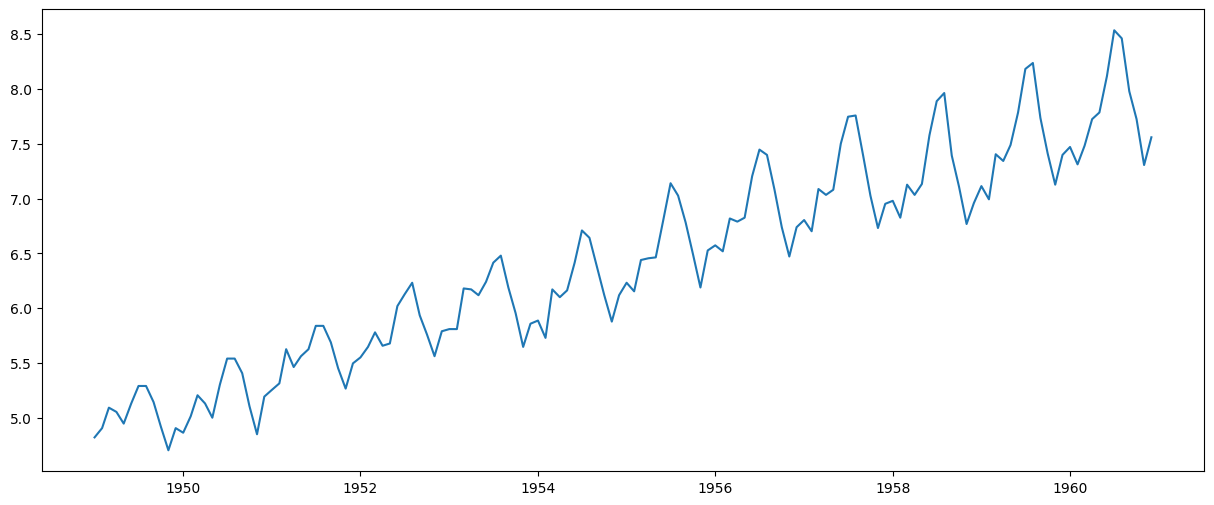

In [183]:
plt.plot(serie3)
plt.show()

In [184]:
serie3

Month
1949-01-01    4.820285
1949-02-01    4.904868
1949-03-01    5.091643
1949-04-01    5.052774
1949-05-01    4.946087
                ...   
1960-08-01    8.462348
1960-09-01    7.979112
1960-10-01    7.725032
1960-11-01    7.306144
1960-12-01    7.559526
Length: 144, dtype: float64

## serie 3 que recebeu o processo de transformação. A tendência era bem definida. Mas na série 4 mudou , em busca da estaionaridade, na diferenciaçã. 

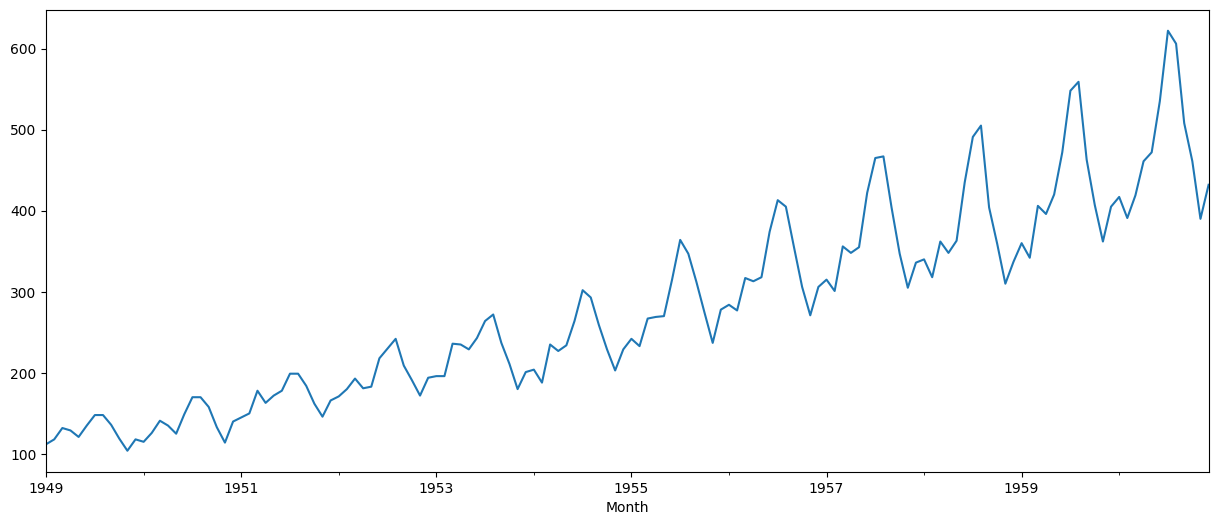

In [185]:
serie.plot()
plt.show()

### na série pura, origina, série vemos também uma tendência se elevando, igual a série 3, onde foi buscar a normalidade, com a série4, e não foi na busca da estacionaridade. 


### Como fazemos o cáculo da diferenciação, função = np.diff(serie3)

### Podemos fazer o cáculo de outra forma, subtraindo a série e usando o comando shift(), que é subtração da série, com um valor antecessor dela mesma. 

In [186]:
# Cálculo da Diferenciação
#Subtração da série por um valor antecessor dela mesma
serie_diff = serie3 - serie3.shift()
#subtrair o valor - o valor antecessor


In [187]:
serie_diff

Month
1949-01-01         NaN
1949-02-01    0.084584
1949-03-01    0.186775
1949-04-01   -0.038869
1949-05-01   -0.106687
                ...   
1960-08-01   -0.073830
1960-09-01   -0.483236
1960-10-01   -0.254080
1960-11-01   -0.418889
1960-12-01    0.253383
Length: 144, dtype: float64

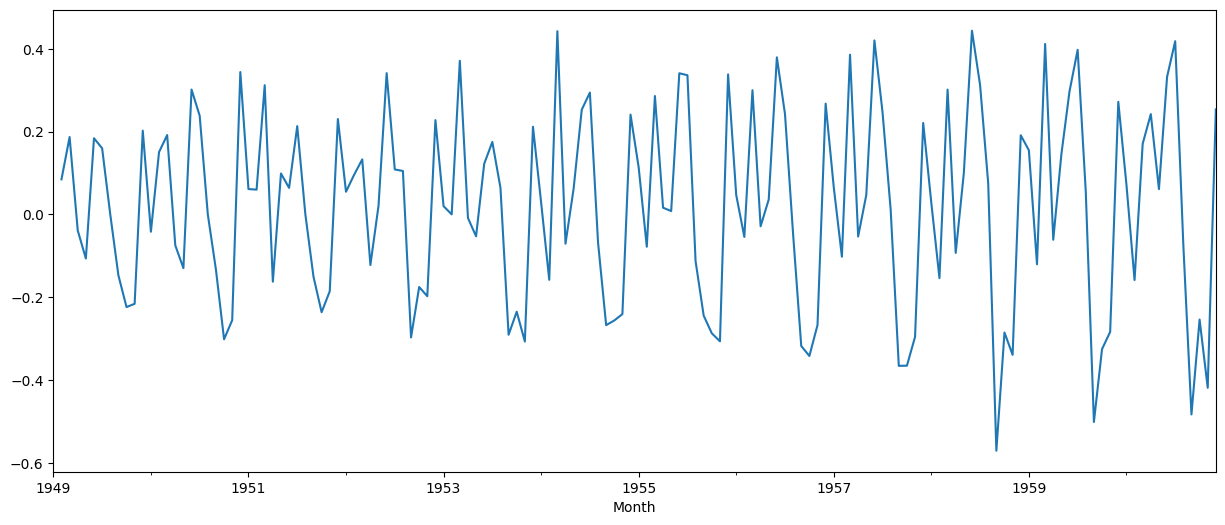

In [188]:
serie_diff.plot()
plt.show()

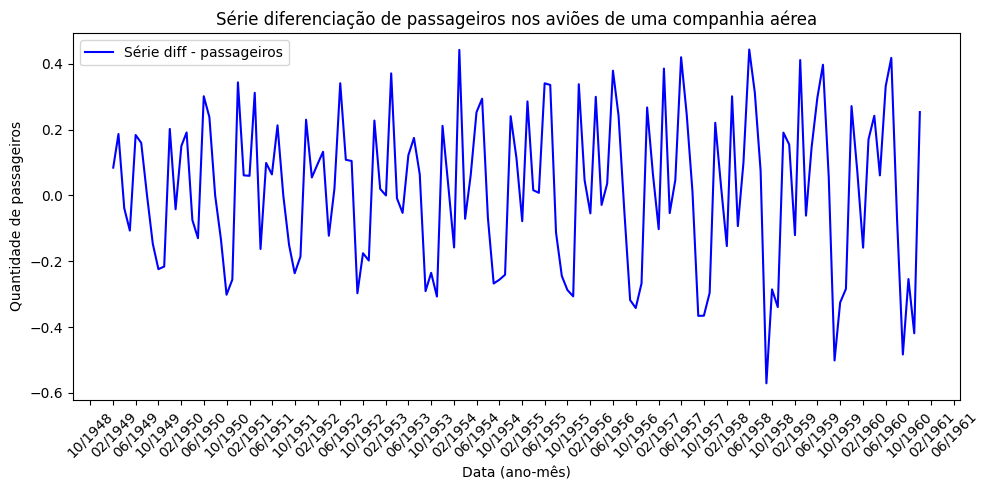

In [189]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Certificando-se de que o índice é uma série temporal (caso não esteja)
if not pd.api.types.is_datetime64_any_dtype(serie_diff.index):
    serie_diff.index = pd.to_datetime(serie_diff.index, format='%Y-%m')  # Converte para ano-mês

# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série usando o índice como eixo x
plt.plot(serie_diff.index, serie_diff.values, label='Série diff - passageiros', color='blue')

# Adicionando um título ao gráfico
plt.title("Série diferenciação de passageiros nos aviões de uma companhia aérea")

# Definindo rótulos dos eixos
plt.xlabel("Data (ano-mês)")
plt.ylabel("Quantidade de passageiros")

# Configurando os tracinhos no eixo X de 4 em 4 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Tracinhos a cada 4 meses

# Formatando o eixo X para mostrar apenas ano e mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Exibindo apenas ano e mês

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=45)

# Adicionando a legenda
plt.legend()

# Ajustando para melhor layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

ainda tem variância, mesmo que leve,  entre os dados, na série original com a diferenciação. 

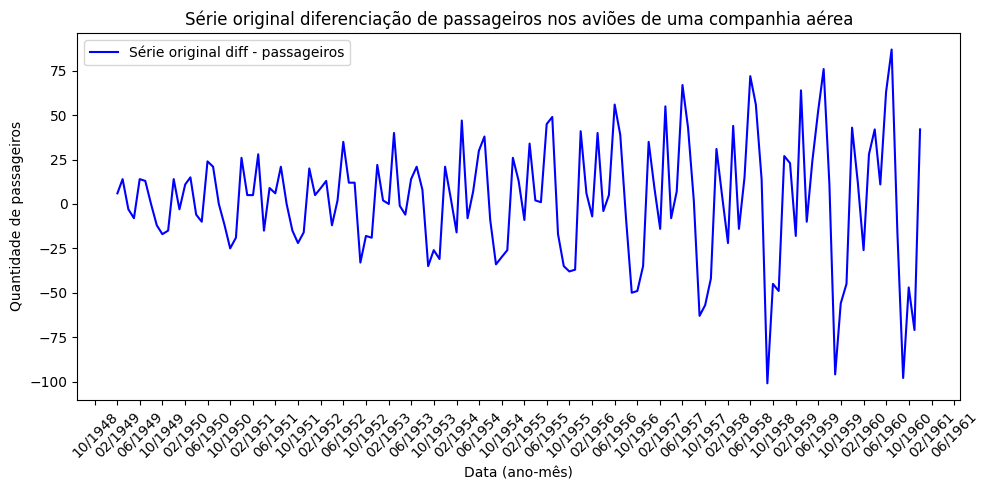

In [190]:
# na série original


# Cálculo da Diferenciação
#Subtração da série por um valor antecessor dela mesma
serie_diff_or = serie - serie.shift()
#subtrair o valor - o valor antecessor

import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Certificando-se de que o índice é uma série temporal (caso não esteja)
if not pd.api.types.is_datetime64_any_dtype(serie_diff_or.index):
    serie_diff.index = pd.to_datetime(serie_diff_or.index, format='%Y-%m')  # Converte para ano-mês

# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série usando o índice como eixo x
plt.plot(serie_diff_or.index, serie_diff_or.values, label='Série original diff - passageiros', color='blue')

# Adicionando um título ao gráfico
plt.title("Série original diferenciação de passageiros nos aviões de uma companhia aérea")

# Definindo rótulos dos eixos
plt.xlabel("Data (ano-mês)")
plt.ylabel("Quantidade de passageiros")

# Configurando os tracinhos no eixo X de 4 em 4 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Tracinhos a cada 4 meses

# Formatando o eixo X para mostrar apenas ano e mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Exibindo apenas ano e mês

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=45)

# Adicionando a legenda
plt.legend()

# Ajustando para melhor layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## ainda na série_diff, pela série 3, ainda não conseguimos verificar se é estacionária ou não, mas a tendência melhorou. Vamos fazer novos testes estatísticos. 

## Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)


Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

Vamos utilizar a série 4, que é => serie4 = np.diff(serie3)


In [191]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

    

Estatítica do teste: 0.0266
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/tmp/ipykernel_5341/3449542551.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie4)


In [192]:

if kpss[0] > kpss[3]['5%']:
  print('Ha = não é estacionário: Estatítica do teste: {:.4f} > valor crítico {}'.format(kpss[0],kpss[3]['5%']))
if kpss[0] < kpss[3]['5%']:
  print('Ho = é estacionário: Estatítica do teste: {:.4f} < valor crítico {}'.format(kpss[0],kpss[3]['5%']))  

Ho = é estacionário: Estatítica do teste: 0.0266 < valor crítico 0.463


Se não tivesse conseguido tornar a série de forma estacionária, a gente faria uma segunda diferenciação. Indicando uma <b>diferenciação de segunda ordem</b>

In [193]:
# Diferenciação de segunda ordem
serie5 = np.diff(serie4)

In [194]:
serie5

array([ 1.02191635e-01, -2.25644261e-01, -6.78178815e-02,  2.90527301e-01,
       -2.41957641e-02, -1.59644633e-01, -1.47009291e-01, -7.68691555e-02,
        7.86308784e-03,  4.18214115e-01, -2.44122757e-01,  1.92277804e-01,
        4.11761246e-02, -2.66429952e-01, -5.50278167e-02,  4.31387032e-01,
       -6.32601280e-02, -2.38199064e-01, -1.33538081e-01, -1.68113373e-01,
        4.59903176e-02,  5.99347652e-01, -2.82592745e-01, -1.38879722e-03,
        2.52228509e-01, -4.74604239e-01,  2.61412952e-01, -3.48136334e-02,
        1.49117571e-01, -2.13046132e-01, -1.50538501e-01, -8.58336801e-02,
        5.06478309e-02,  4.15951582e-01, -1.75592789e-01,  4.10826276e-02,
        3.70633215e-02, -2.55124131e-01,  1.43102284e-01,  3.20291739e-01,
       -2.32586264e-01, -3.71001128e-03, -4.01961553e-01,  1.21700624e-01,
       -2.21605341e-02,  4.25330060e-01, -2.07837244e-01, -1.98253615e-02,
        3.70960872e-01, -3.79701685e-01, -4.42318071e-02,  1.75190917e-01,
        5.25988943e-02, -

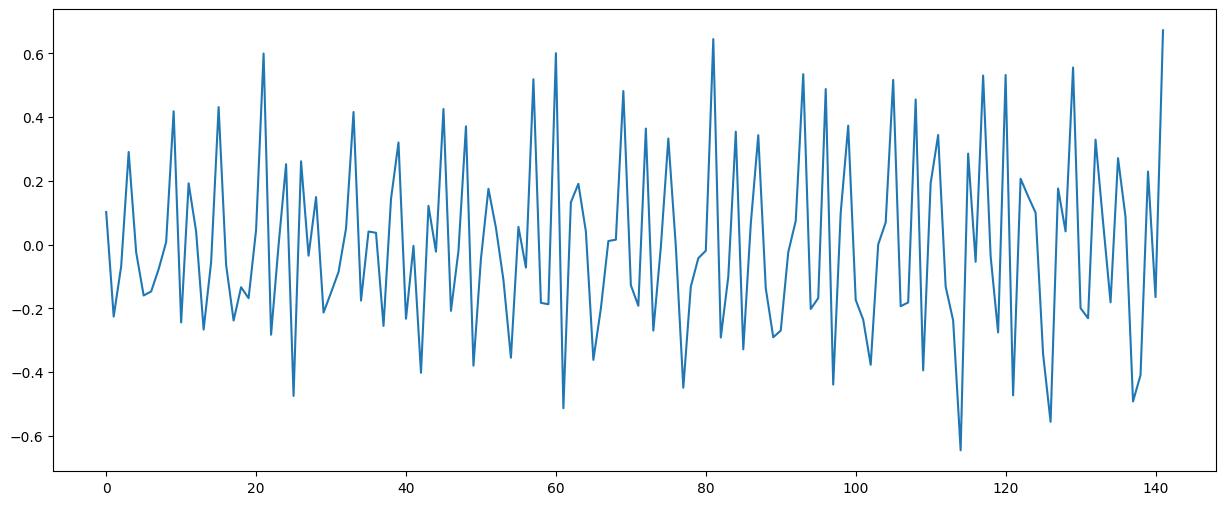

In [195]:
plt.plot(serie5)
plt.show()

In [196]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0762
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/tmp/ipykernel_5341/1100002076.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie5)


na segunda diferenciação da série há uma uniformidade maior entre a variância ou a distância entre os picos, que parece que estão mais definidas, se comparada na última diferenciação pela série 3. 

O caso é se precisasse. 

A tendência é melhorar sempre, o lado ruim, depois que fazemos a previsão, os nossos dados estão todos distorcidos. A gente tem que reverter o processo de diferenciação e de transformação. Dando um trabalho a mais, que teremos que reverter 2 vezes na diferenciação, nesse exemplo. 

In [197]:

if kpss[0] > kpss[3]['5%']:
  print('Ha = não é estacionário: Estatítica do teste: {:.4f} > valor crítico {}'.format(kpss[0],kpss[3]['5%']))
if kpss[0] < kpss[3]['5%']:
  print('Ho = é estacionário: Estatítica do teste: {:.4f} < valor crítico {}'.format(kpss[0],kpss[3]['5%']))  

Ho = é estacionário: Estatítica do teste: 0.0762 < valor crítico 0.463


## ----------------------------------------------------------------------------------------------------------------

In [198]:
# dados de decomposição da série original

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose

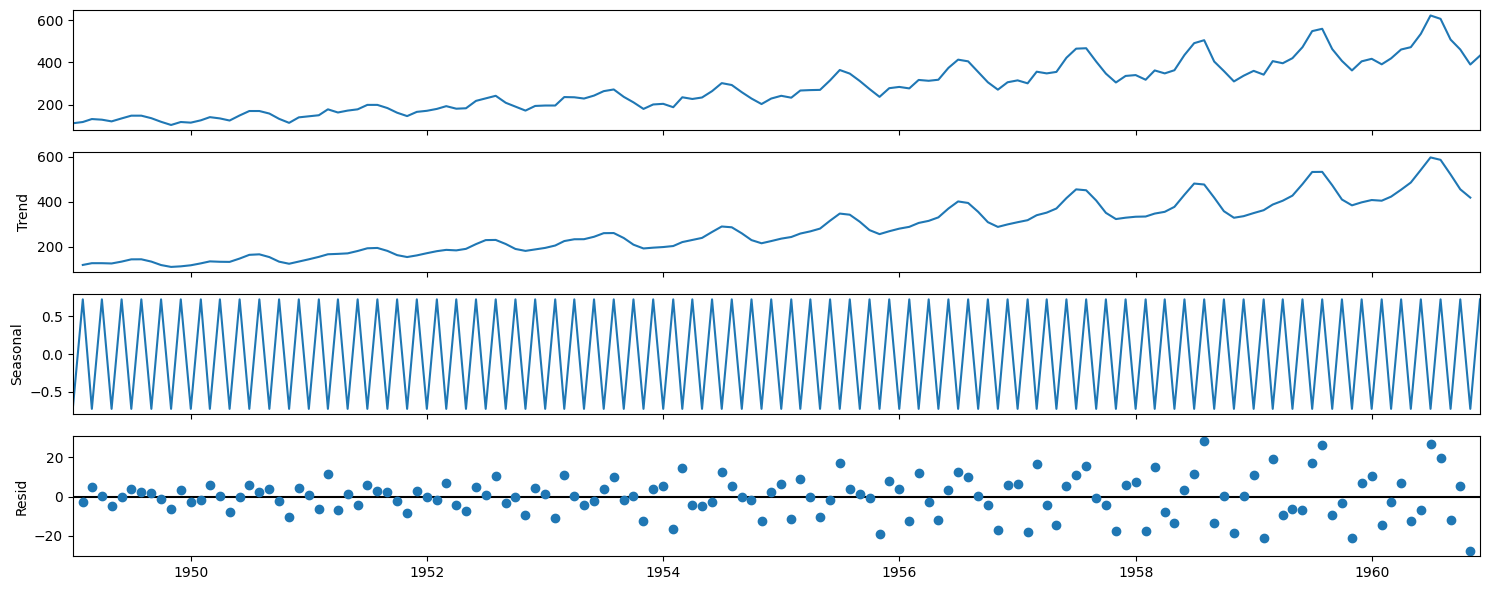

In [200]:
decomposicao = seasonal_decompose(serie, period=2)
decomposicao.plot();